## The Team Orienteering Problem (TOP)
is an attractive variant of the Vehicle Routing Problem (VRP).The
aim is to select customers and at the same time organize the visits for a vehicle fleet so as to maximize
the collected profits and subject to a travel time restriction on each vehicle.

TOP is modeled with a complete directed graph G = (V, A)
where V = {1,…,n }∪{d,a} is the set of vertices representing the
customers and the depots, and A = {(i,j)i,j ∈ V|i≠j} the set of
arcs linking the different vertices together.The departure and the
arrival depots for the vehicles are representaed by the vertices d
and a.

In [374]:
#!/usr/bin/env python
#all libraries needed are imported here

import networkx as nx
import gurobipy as gb
import argparse
from argparse import ArgumentTypeError
import os
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [375]:
# Classical functions needed to represent the graph and the solution
# Drawing 
# functions
#

#
# Drawing 
# functions
#


def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, pos=pos, linewidths=0.6, fontsize=8,\
                           shape='circle', node_size=500,\
                           node_color='white', edgecolors='black')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='k')
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(G.nodes[i]['x'], G.nodes[i]['y']) for i in G.nodes()}

    
    nx.draw_networkx_nodes(G, pos=pos, linewidths=0.6, fontsize=8,\
                           shape='circle', node_size=500,\
                           node_color='white', edgecolors='black')
    
    nx.draw_networkx_labels(G, pos=pos, font_color='k')
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.99:
            
            nx.draw_networkx_edges(G, pos=pos,\
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos, \
                                         edgelist=[(u,v)],\
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,\
                                   edgelist=[(u,v)],\
                                   edge_color='k')
        
    
    plt.axis('off')
    plt.show()




    
class args:
    filename = None
    scale = 30
    capacity = 5000
    figsize = (20,10)
    

G has 15 nodes and 210 edges


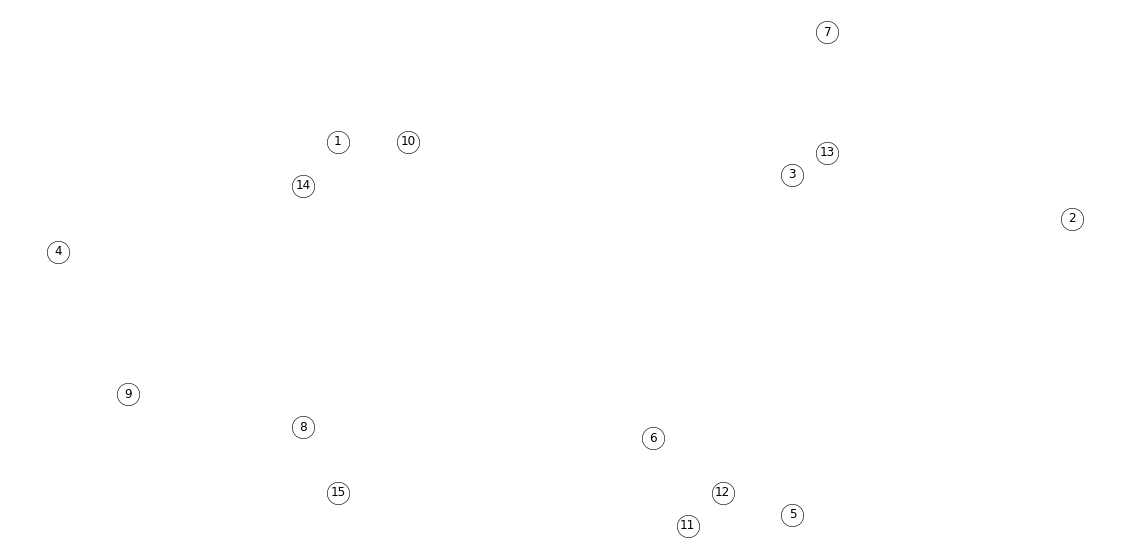

In [376]:
# 
# Read the graph in the graphML format
#

args.filename = 'assgnPolishchuk.gml'

basename = os.path.splitext(args.filename)[0]

G = nx.read_graphml (args.filename, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges")

depot = list(G.nodes())[0]

DrawInitG(G)



In [377]:
G.nodes(data=True)

NodeDataView({1: {'y': 36, 'x': 9, 'profit': 778}, 2: {'y': 29, 'x': 30, 'profit': 1378}, 3: {'y': 33, 'x': 22, 'profit': 458}, 4: {'y': 26, 'x': 1, 'profit': 1747}, 5: {'y': 2, 'x': 22, 'profit': 1483}, 6: {'y': 9, 'x': 18, 'profit': 180}, 7: {'y': 46, 'x': 23, 'profit': 1518}, 8: {'y': 10, 'x': 8, 'profit': 340}, 9: {'y': 13, 'x': 3, 'profit': 451}, 10: {'y': 36, 'x': 11, 'profit': 1249}, 11: {'y': 1, 'x': 19, 'profit': 129}, 12: {'y': 4, 'x': 20, 'profit': 939}, 13: {'y': 35, 'x': 23, 'profit': 768}, 14: {'y': 32, 'x': 8, 'profit': 1037}, 15: {'y': 4, 'x': 9, 'profit': 1529}})

In [378]:
# Model init. L variable from paper and profit list.
top = gb.Model("TOP formulation")

L = 100000# would be a travel cost limit 

profit = nx.get_node_attributes (G,'profit')


top.write('top.lp')

In [379]:
#List of all distances attributes that we have in the graph
Distance = nx.get_edge_attributes (G,'dist')


Distance

{(1, 2): 2217,
 (1, 3): 1343,
 (1, 4): 1290,
 (1, 5): 3650,
 (1, 6): 2853,
 (1, 7): 1720,
 (1, 8): 2607,
 (1, 9): 2385,
 (1, 10): 207,
 (1, 11): 3650,
 (1, 12): 3388,
 (1, 13): 1413,
 (1, 14): 412,
 (1, 15): 3210,
 (2, 1): 2220,
 (2, 3): 899,
 (2, 4): 2918,
 (2, 5): 2825,
 (2, 6): 2342,
 (2, 7): 1842,
 (2, 8): 2914,
 (2, 9): 3142,
 (2, 10): 2030,
 (2, 11): 3018,
 (2, 12): 2696,
 (2, 13): 929,
 (2, 14): 2229,
 (2, 15): 3267,
 (3, 1): 1338,
 (3, 2): 903,
 (3, 4): 2218,
 (3, 5): 3100,
 (3, 6): 2440,
 (3, 7): 1311,
 (3, 8): 2693,
 (3, 9): 2758,
 (3, 10): 1148,
 (3, 11): 3221,
 (3, 12): 2915,
 (3, 13): 232,
 (3, 14): 1413,
 (3, 15): 3181,
 (4, 1): 1282,
 (4, 2): 2918,
 (4, 3): 2219,
 (4, 5): 3198,
 (4, 6): 2407,
 (4, 7): 2978,
 (4, 8): 1756,
 (4, 9): 1325,
 (4, 10): 1414,
 (4, 11): 3083,
 (4, 12): 2916,
 (4, 13): 2382,
 (4, 14): 926,
 (4, 15): 2347,
 (5, 1): 3643,
 (5, 2): 2822,
 (5, 3): 3105,
 (5, 4): 3199,
 (5, 6): 814,
 (5, 7): 4403,
 (5, 8): 1619,
 (5, 9): 2197,
 (5, 10): 3575,
 (5, 11)

In [380]:
# a,d variables from formulation. M - number of identical machines.
departure = 1
arrival = 15
m = 3


In [381]:
# Our decission variables, vtype for each is binary, so we are implementing the integral requir. from the paper.
x = top.addVars([(i,j) for (i,j) in G.edges()],
                    vtype=gb.GRB.BINARY,
                    name='x')

y = top.addVars([i for i in G.nodes()],
                   vtype=gb.GRB.BINARY,
                    name='y')


In [382]:
# We want each client to be visited just once, excluding the depart. and arrival nodes.
# Assignment constraints
#

#
# Forward star
#

top.addConstrs((x.sum(i,'*') == 1 for i in G.nodes() if i != arrival and i != departure), name='FS')



# Reverse star
#

top.addConstrs((x.sum('*',i) == 1 for i in G.nodes() if i != departure and i!= arrival), name='RS')


top.update()



In [383]:
# Here is the constraints that i`ve modified from MTSP model to meet the requirments from the paper (about the arrival 
# and dep. nodes)
top.addConstr(x.sum(departure,'*') == m, name = 'OUT-R')
top.addConstr(x.sum('*',arrival) == m, name = 'IN-R')

top.update()

In [384]:
profit = nx.get_node_attributes (G,'profit')
# profit is considered zero for 2 depots as stated in the paper
profit[1]=0
profit[15]=0
profit

{1: 0,
 2: 1378,
 3: 458,
 4: 1747,
 5: 1483,
 6: 180,
 7: 1518,
 8: 340,
 9: 451,
 10: 1249,
 11: 129,
 12: 939,
 13: 768,
 14: 1037,
 15: 0}

In [385]:
# function that is needed to be optimized
top.setObjective(y.prod(profit), gb.GRB.MAXIMIZE)

In [386]:
top.addConstrs((y.sum(i,'*') <= 1 for i in G.nodes()),name='Each_cus_visited_once')
top.update()

In [387]:
top.addConstr((gb.quicksum(x[i,j]*Distance[i,j] for i,j in G.edges()) <= L),name='travel length restr.')

top.update()
top.write('top.lp')

In [388]:
top.addConstrs((x[i,j] + x[j,i] <= 1 \
                 for i,j in G.edges() \
                 if j > i and i != departure or arrival and j != departure or arrival ),\
                name='SUB2')

top.update()
top.write('top.lp')

In [389]:
top.addConstrs ((x[i,j] == 0 for i,j in G.edges() if j==departure), name='root constr')

top.addConstrs ((x[i,j] == 0 for i,j in G.edges() if i==arrival), name='arr constr')

top.write('top.lp')
top.update()

In [390]:
top.optimize()

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 282 rows, 225 columns and 1065 nonzeros
Model fingerprint: 0x61e406c6
Variable types: 0 continuous, 225 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+02, 2e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Found heuristic solution: objective 11677.000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 11677 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.167700000000e+04, best bound 1.167700000000e+04, gap 0.0000%


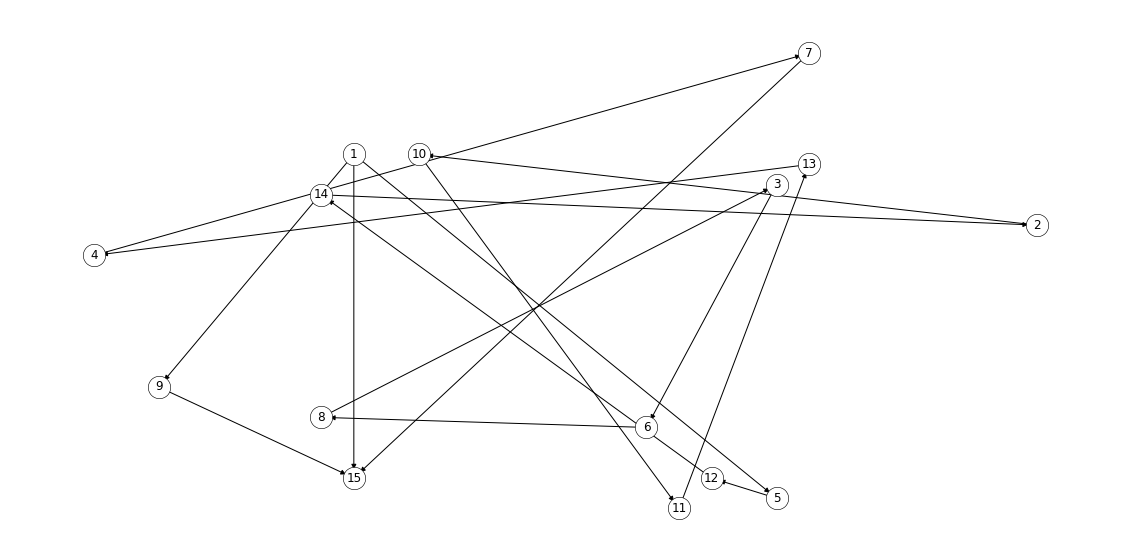

In [391]:
DrawSol(G, x)